In [90]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [91]:
path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/achviement 4/4'
customer_profile=pd.read_pickle(os.path.join(path, 'customers_profile.pkl'))

# Marketing team 
* customer profiling based on their income,age,number of dependants
* using these customer profile marketing team can strategize the customer segamentation


In [3]:
customer_profile.head()

,order_id,user_id,days_since_prior_order,department_id,prices,age,number_of_dependents,income,region,age_profile,dependents_profile,income_profile,customer_profile,mean_price_per_customer_profile,max_price_per_customer_profile,min_price_per_customer_profile,mean_usage_per_customer_profile,max_usage_per_customer_profile,min_usage_per_customer_profile
0,2539329,1,NaN,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.100197,25.0,1.0,11.432228,30.0,0.0
1,2398795,1,15.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.100197,25.0,1.0,11.432228,30.0,0.0
2,473747,1,21.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.100197,25.0,1.0,11.432228,30.0,0.0
3,2254736,1,29.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.100197,25.0,1.0,11.432228,30.0,0.0
4,431534,1,28.0,7,9.0,31,3,40423,South,Adult,With kids,Low income,Adult_With kids_Low income,7.100197,25.0,1.0,11.432228,30.0,0.0


In [4]:
customer_profile.dtypes

order_id                            object
user_id                             object
days_since_prior_order             float64
department_id                        int64
prices                             float64
age                                  int64
number_of_dependents                 int64
income                               int64
region                              object
age_profile                         object
dependents_profile                  object
income_profile                      object
customer_profile                    object
mean_price_per_customer_profile    float64
max_price_per_customer_profile     float64
min_price_per_customer_profile     float64
mean_usage_per_customer_profile    float64
max_usage_per_customer_profile     float64
min_usage_per_customer_profile     float64
dtype: object

In [5]:
#Create a subset to avoid RAM issues
#Selecting columns to avoid RAM memory issues
variables = ['order_id', 'user_id', 'days_since_prior_order', 'department_id', 'prices', 'region', 'customer_profile']
customer_profile = customer_profile.loc[:, variables]

In [6]:
customer_profile.shape

(32404859, 7)

In [7]:
customer_profile.head()

,order_id,user_id,days_since_prior_order,department_id,prices,region,customer_profile
0,2539329,1,NaN,7,9.0,South,Adult_With kids_Low income
1,2398795,1,15.0,7,9.0,South,Adult_With kids_Low income
2,473747,1,21.0,7,9.0,South,Adult_With kids_Low income
3,2254736,1,29.0,7,9.0,South,Adult_With kids_Low income
4,431534,1,28.0,7,9.0,South,Adult_With kids_Low income


# distribution profile

In [8]:
#Frequency of customer profiles
distribution = customer_profile['customer_profile'].value_counts(dropna=False)

In [9]:
distribution

customer_profile
Adult_With kids_Middle income          11813920
Retired_With kids_Middle income         5669142
Adult_No kids_Middle income             3968706
Adult_With kids_Low income              2905867
Young adult_With kids_Middle income     2064353
Retired_No kids_Middle income           1875716
Adult_No kids_Low income                 980734
Young adult_With kids_Low income         975669
Retired_With kids_Low income             743742
Young adult_No kids_Middle income        670301
Young adult_No kids_Low income           324040
Retired_No kids_Low income               230089
Adult_With kids_High income               84929
Retired_With kids_High income             42116
Adult_No kids_High income                 30430
Retired_No kids_High income               14279
Young adult_With kids_High income          7618
Young adult_No kids_High income            3208
Name: count, dtype: int64

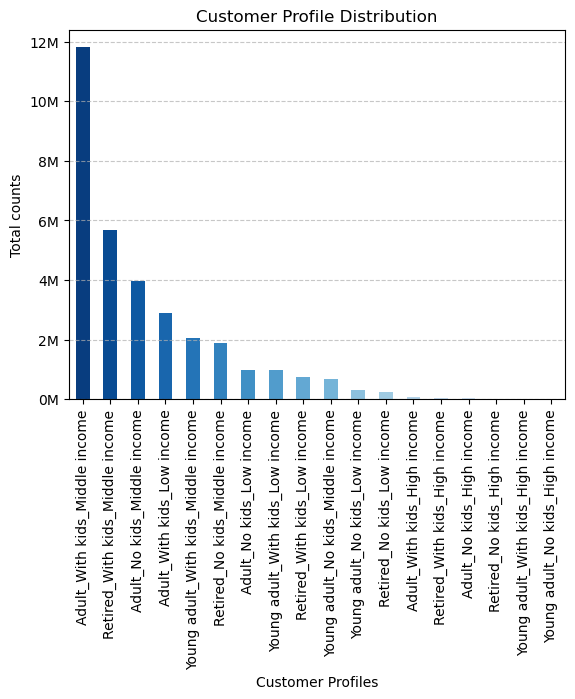

In [22]:
#Plotting frequency with a bar chart
#Reverse the 'Blues' colormap
colors = sns.color_palette("Blues", len(distribution))
colors = list(reversed(colors))

ax = distribution.plot.bar(color=colors)

#Adding main title
plt.title("Customer Profile Distribution")

#Adding x-axis label
plt.xlabel("Customer Profiles")

#Adding y-axis label
plt.ylabel("Total counts")

#Changing y-axis to display values in Millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
filename = 'bar_customer_profile_distribution.png'
filepath = os.path.join(path, filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show the plot
plt.show()

# ordering patterns
Is there a difference in ordering habits among customer profiles?

In [23]:
#Total sum per customer profile
total_prices_table = pd.pivot_table(customer_profile, values='prices', index='customer_profile', aggfunc='sum').reset_index()

#Sort in descending order
total_prices_table = total_prices_table.sort_values(by='prices', ascending=False)

#Display the sorted table without showing the index
total_prices_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,prices
5,Adult_With kids_Middle income,94027467.200000
11,Retired_With kids_Middle income,45150895.300000
2,Adult_No kids_Middle income,31585225.000000
4,Adult_With kids_Low income,20632220.200000
17,Young adult_With kids_Middle income,16424945.300000
8,Retired_No kids_Middle income,14933444.300000
16,Young adult_With kids_Low income,7253294.000000
1,Adult_No kids_Low income,6956712.300000
14,Young adult_No kids_Middle income,5332815.000000
10,Retired_With kids_Low income,4832967.000000


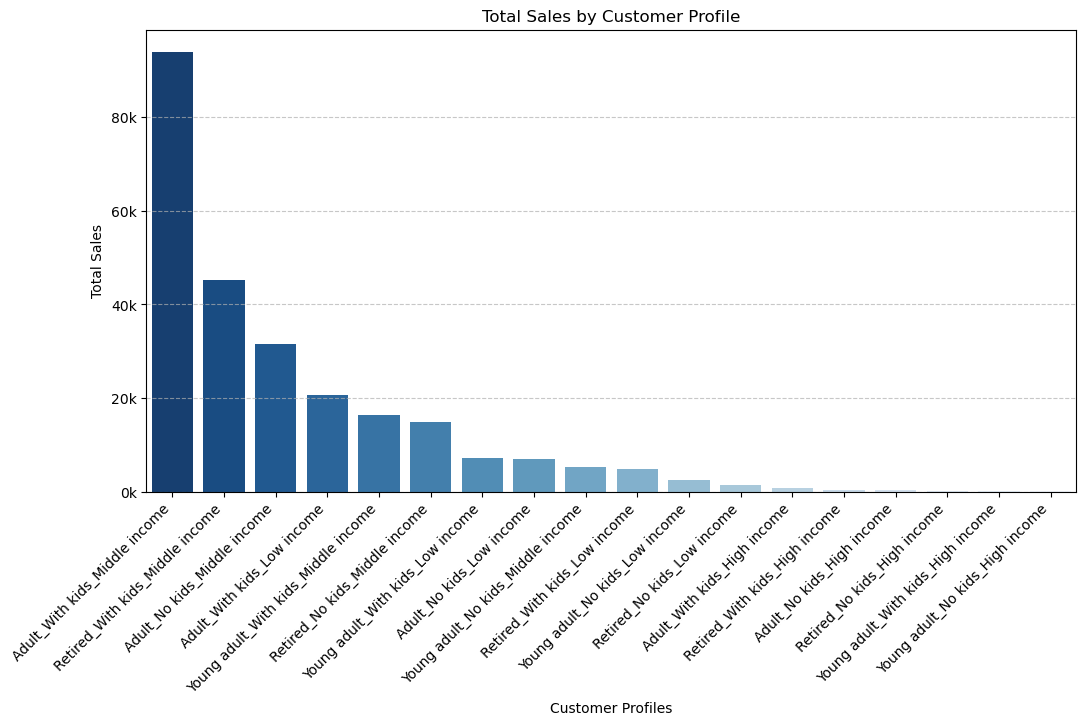

In [24]:
#Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='prices', data=total_prices_table, palette='Blues_r', order=total_prices_table.sort_values('prices', ascending=False)['customer_profile'])
plt.title("Total Sales by Customer Profile")
plt.xlabel("Customer Profiles")
plt.ylabel("Total Sales")

#Changing y-axis to display values in Millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:}k".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Save the plot in the specified directory
filename = 'bar_customer_profile_total_price.png'
filepath = os.path.join(path, filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

# instcart app usage frequecy 

In [25]:
#Average "days_since_prior_order" per customer profile 
usage_table = pd.pivot_table(customer_profile, values='days_since_prior_order', index='customer_profile', aggfunc='mean').reset_index()

#Sort in descending order
usage_table = usage_table.sort_values(by='days_since_prior_order')

#Display the sorted table without showing the index
usage_table.style.set_table_styles([{'selector': 'thead', 'props': [('display', 'none')]}])

,customer_profile,days_since_prior_order
6,Retired_No kids_High income,9.671097
0,Adult_No kids_High income,9.739376
15,Young adult_With kids_High income,9.788587
9,Retired_With kids_High income,10.350285
3,Adult_With kids_High income,10.448068
17,Young adult_With kids_Middle income,10.929577
8,Retired_No kids_Middle income,10.980260
2,Adult_No kids_Middle income,10.986747
11,Retired_With kids_Middle income,11.032766
5,Adult_With kids_Middle income,11.071566


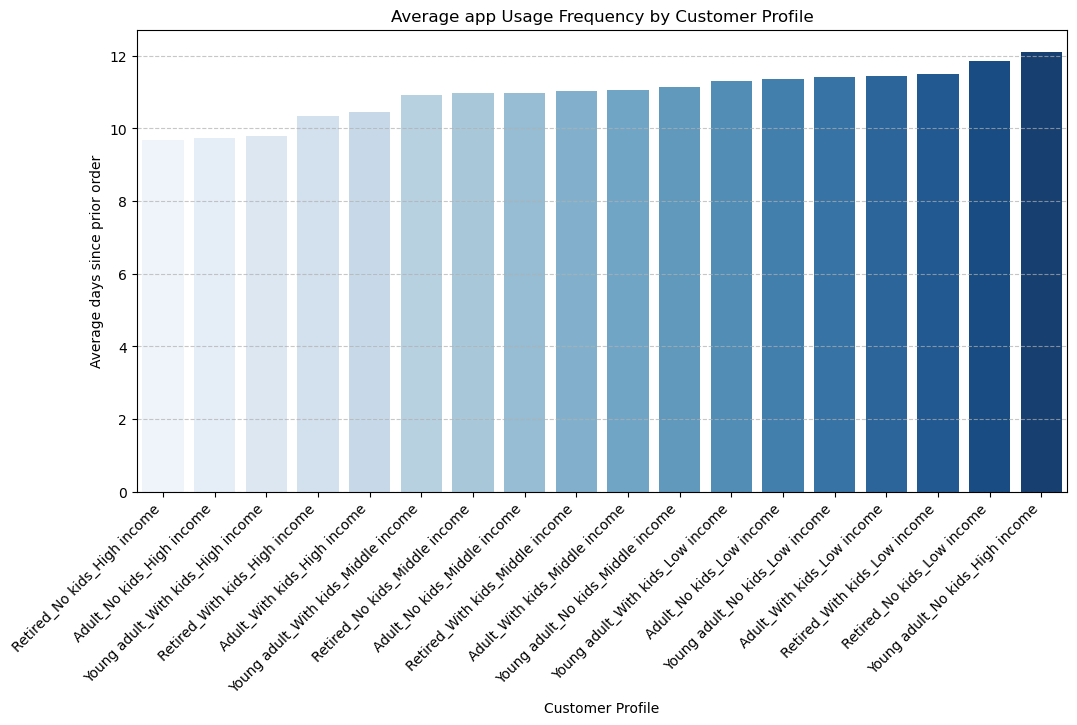

In [26]:
#Plotting the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='customer_profile', y='days_since_prior_order', data=usage_table, palette='Blues', order=usage_table.sort_values('days_since_prior_order')['customer_profile'])
plt.title("Average app Usage Frequency by Customer Profile")
plt.xlabel("Customer Profile")
plt.ylabel("Average days since prior order")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
filename = 'bar_customer_profile_app_usage_frequency.png'
filepath = os.path.join(path, filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

# Regarding usage frequency averages, 
an interesting trend emerges. Customer profiles with low incomes exhibit a more frequent ordering pattern,
with an average order placement interval of approximately 9 days. 
our top three previously identified customer profiles, distinguished by both frequency and sales,
tend to place orders at a same frequency, averaging around 9 days.

# customer profile popularity in each region

In [27]:
#Group by 'region' and 'customer_profile' and count occurrences
region_profile_counts = customer_profile.groupby(['region', 'customer_profile']).size().reset_index(name='profile_count')

#Sort profiles within each region by count in descending order
sorted_profiles = region_profile_counts.sort_values(by=['region', 'profile_count'], ascending=[True, False])

#Print or display the result
sorted_profiles

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2999522
11,Midwest,Retired_With kids_Middle income,1432215
2,Midwest,Adult_No kids_Middle income,1035062
4,Midwest,Adult_With kids_Low income,732461
17,Midwest,Young adult_With kids_Middle income,524471
...,...,...,...
63,West,Retired_With kids_High income,9182
54,West,Adult_No kids_High income,6112
60,West,Retired_No kids_High income,2525
69,West,Young adult_With kids_High income,2238


In [28]:
#Filter the top 3 profiles per region
top_profiles_per_region = sorted_profiles.groupby('region').head(3)
top_profiles_per_region

,region,customer_profile,profile_count
5,Midwest,Adult_With kids_Middle income,2999522
11,Midwest,Retired_With kids_Middle income,1432215
2,Midwest,Adult_No kids_Middle income,1035062
23,Northeast,Adult_With kids_Middle income,2089889
29,Northeast,Retired_With kids_Middle income,1020575
20,Northeast,Adult_No kids_Middle income,665379
41,South,Adult_With kids_Middle income,3680669
47,South,Retired_With kids_Middle income,1766502
38,South,Adult_No kids_Middle income,1234050
59,West,Adult_With kids_Middle income,3043840


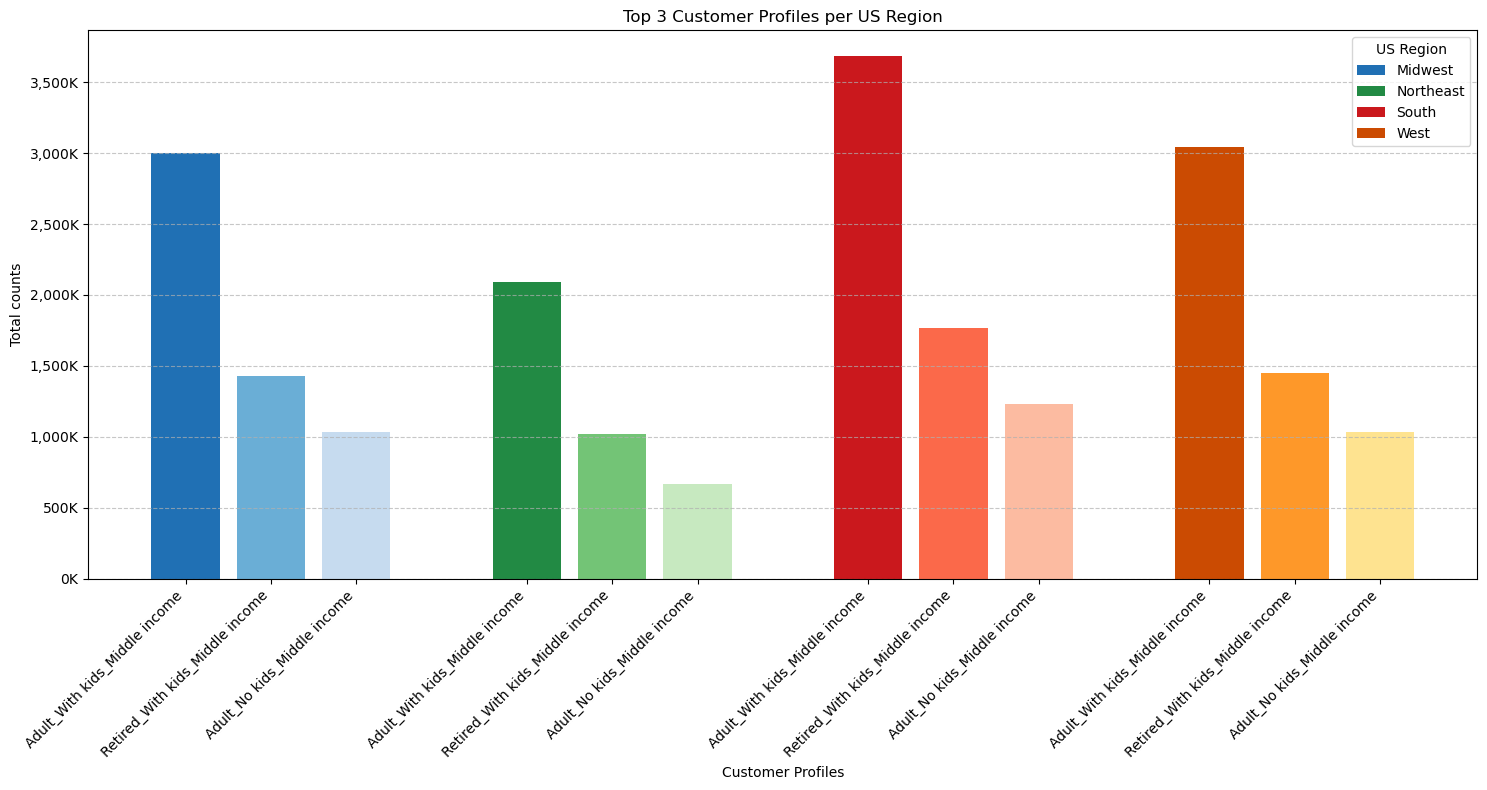

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Assuming 'sorted_profiles' is your DataFrame
# Example: sorted_profiles = pd.DataFrame({'region': ['East', 'West', ...], 'customer_profile': ['Profile A', 'Profile B', ...], 'profile_count': [1000, 1500, ...]})

fig, ax = plt.subplots(figsize=(15, 8))

tick_positions = []
tick_labels = []

# Updated colormaps list with valid colormap names
colormaps = ['Blues', 'Greens', 'Reds', 'YlOrBr']  # Using 'YlOrBr' for yellow shades

for i, region in enumerate(sorted(sorted_profiles['region'].unique())):
    region_data = sorted_profiles[sorted_profiles['region'] == region].head(3)
    colors = sns.color_palette(colormaps[i % len(colormaps)], len(region_data))
    colors = list(reversed(colors))  # Reverse the color palette

    plt.bar(np.arange(len(region_data)) + i * 4, region_data['profile_count'], color=colors, label=region)

    tick_positions.extend(np.arange(len(region_data)) + i * 4)
    tick_labels.extend(region_data['customer_profile'].tolist())

plt.title("Top 3 Customer Profiles per US Region")
plt.xlabel("Customer Profiles")
plt.ylabel("Total counts")
plt.legend(title='US Region')
plt.xticks(tick_positions, tick_labels, rotation=45, ha='right')
plt.tight_layout()

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


# department sales

In [30]:
#Create a subset to avoid RAM issues
#Selecting columns to avoid RAM memory issues
variables = ['order_id', 'user_id', 'department_id', 'prices', 'customer_profile']
cust_departments = customer_profile.loc[:, variables]

In [31]:
cust_departments.head()

,order_id,user_id,department_id,prices,customer_profile
0,2539329,1,7,9.0,Adult_With kids_Low income
1,2398795,1,7,9.0,Adult_With kids_Low income
2,473747,1,7,9.0,Adult_With kids_Low income
3,2254736,1,7,9.0,Adult_With kids_Low income
4,431534,1,7,9.0,Adult_With kids_Low income


In [32]:
cust_departments.shape

(32404859, 5)

In [33]:
cust_departments.dtypes

order_id             object
user_id              object
department_id         int64
prices              float64
customer_profile     object
dtype: object

In [34]:
#Creating a variable containing the department names
#Creating a dictionary
#NOTE: Dictionary provided by Instacart team
department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [35]:
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [36]:
#Convert 'department_id' to string to match the keys in the dictionary
cust_departments['department_id'] = cust_departments['department_id'].astype(str)

In [37]:
#Map 'department_id' to 'department_name' using the dictionary
cust_departments['department_name'] = cust_departments['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [38]:
#See results
cust_departments.head()
#"department_name" was added

,order_id,user_id,department_id,prices,customer_profile,department_name
0,2539329,1,7,9.0,Adult_With kids_Low income,beverages
1,2398795,1,7,9.0,Adult_With kids_Low income,beverages
2,473747,1,7,9.0,Adult_With kids_Low income,beverages
3,2254736,1,7,9.0,Adult_With kids_Low income,beverages
4,431534,1,7,9.0,Adult_With kids_Low income,beverages


In [39]:
#Check flags
cust_departments.groupby('department_name').agg({'department_id' : ['min', 'max']})
#nothing odd on the results
#department_name was correctly assigned to the df

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

In [42]:
# Top customer profiles by department 

In [43]:
#See unique values within a variable
cust_departments['customer_profile'].unique()

array(['Adult_With kids_Low income', 'Retired_No kids_Low income',
       'Adult_With kids_Middle income', 'Retired_No kids_Middle income',
       'Retired_With kids_Middle income', 'Retired_With kids_Low income',
       'Young adult_With kids_Low income', 'Adult_No kids_Middle income',
       'Young adult_No kids_Low income', 'Adult_No kids_Low income',
       'Young adult_With kids_Middle income',
       'Young adult_No kids_Middle income',
       'Retired_With kids_High income', 'Adult_With kids_High income',
       'Young adult_With kids_High income', 'Adult_No kids_High income',
       'Young adult_No kids_High income', 'Retired_No kids_High income'],
      dtype=object)

In [44]:
#Filter df to select the top 3 customer profiles see sections 4. Distribution of profiles and 5. Ordering habits  
selected_profiles = ['Adult_With kids_Middle income', 'Retired_With kids_Middle income', 'Adult_No kids_Middle income']
filtered_df = cust_departments[cust_departments['customer_profile'].isin(selected_profiles)]

In [45]:
filtered_df.head()

,order_id,user_id,department_id,prices,customer_profile,department_name
131,2293453,19,7,9.0,Adult_With kids_Middle income,beverages
132,1973799,19,7,9.0,Adult_With kids_Middle income,beverages
133,532817,19,7,9.0,Adult_With kids_Middle income,beverages
134,2474845,19,19,1.6,Adult_With kids_Middle income,snacks
135,86918,19,4,8.8,Adult_With kids_Middle income,produce


In [46]:
#See results
filtered_df.shape
#Nothing odd in the results

(21451768, 6)

In [47]:
#Group by customer_profile and department_name, then calculate the sum of prices
grouped_df = filtered_df.groupby(['customer_profile', 'department_name'])['prices'].sum().reset_index()

In [48]:

grouped_df.shape

(63, 3)

In [49]:

grouped_df.head()

,customer_profile,department_name,prices
0,Adult_No kids_Middle income,alcohol,157131.6
1,Adult_No kids_Middle income,babies,435923.0
2,Adult_No kids_Middle income,bakery,1178458.8
3,Adult_No kids_Middle income,beverages,2465160.6
4,Adult_No kids_Middle income,breakfast,689266.7


In [50]:
#Select the top 5 departments per customer profile based on prices
top_5_profile = grouped_df.groupby('customer_profile', group_keys=False).apply(lambda x: x.nlargest(5, 'prices'))
top_5_profile

,customer_profile,department_name,prices
19,Adult_No kids_Middle income,produce,9644610.4
7,Adult_No kids_Middle income,dairy eggs,5710224.3
3,Adult_No kids_Middle income,beverages,2465160.6
10,Adult_No kids_Middle income,frozen,2157232.7
16,Adult_No kids_Middle income,pantry,1883424.4
40,Adult_With kids_Middle income,produce,28612968.1
28,Adult_With kids_Middle income,dairy eggs,16928688.3
24,Adult_With kids_Middle income,beverages,7322114.0
31,Adult_With kids_Middle income,frozen,6452028.9
37,Adult_With kids_Middle income,pantry,5652500.3


In [51]:
top_5_profile.shape

(15, 3)

In [54]:
#Reordering customer profiles
desired_order = ['Adult_With kids_Middle income','Retired_With kids_Middle income', 'Adult_No kids_Middle income']

top_5_profile['customer_profile'] = pd.Categorical(top_5_profile['customer_profile'], categories=desired_order, ordered=True)
top_5_profile = top_5_profile.sort_values('customer_profile')

#See results
top_5_profile

,customer_profile,department_name,prices
40,Adult_With kids_Middle income,produce,28612968.1
28,Adult_With kids_Middle income,dairy eggs,16928688.3
24,Adult_With kids_Middle income,beverages,7322114.0
31,Adult_With kids_Middle income,frozen,6452028.9
37,Adult_With kids_Middle income,pantry,5652500.3
61,Retired_With kids_Middle income,produce,13738801.0
49,Retired_With kids_Middle income,dairy eggs,8132992.9
45,Retired_With kids_Middle income,beverages,3521737.3
52,Retired_With kids_Middle income,frozen,3094153.2
58,Retired_With kids_Middle income,pantry,2710613.7


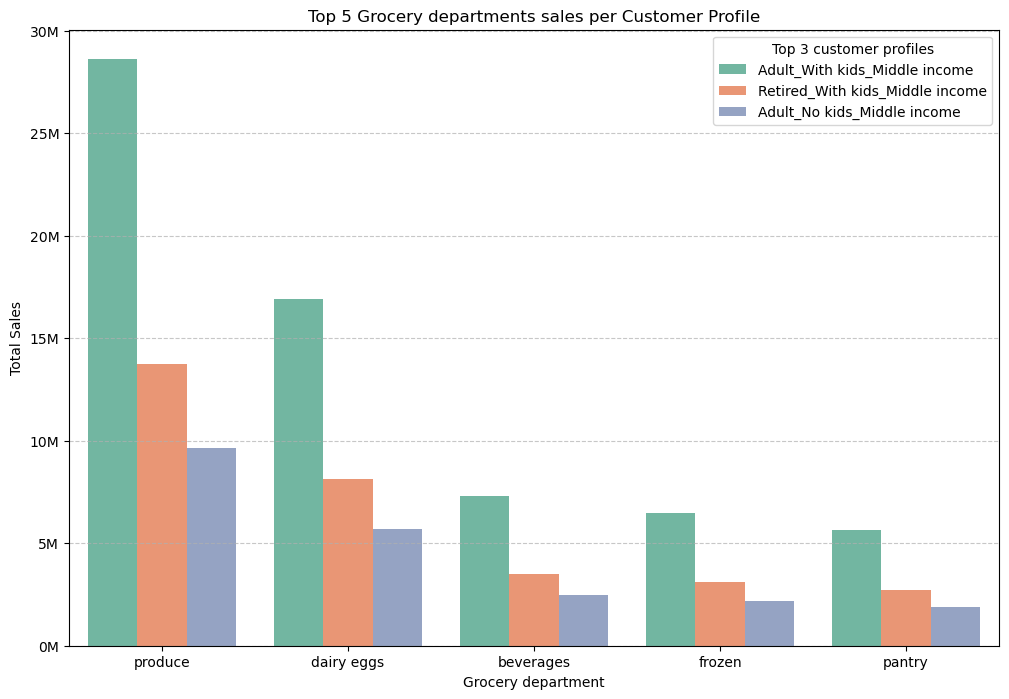

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your existing plot code
plt.figure(figsize=(12, 8))
sns.barplot(x='department_name', y='prices', hue='customer_profile', data=top_5_profile, palette='Set2')  # Changed palette to 'Set2'
plt.title('Top 5 Grocery departments sales per Customer Profile')
plt.xlabel('Grocery department')
plt.ylabel('Total Sales')

# Accessing the current axis
ax = plt.gca()

# Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

# Adding grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Modify legend title
plt.legend(title='Top 3 customer profiles')

plt.show()



1. Top Three Customer Profiles Identified:
    three main customer profiles based on frequency of visits, regional frequency, and total sales.

2. Similar Spending Habits Across Departments: Despite varied profiles, customers exhibit similar spending habits across key grocery departments.

3. Predominant Expenditure Categories: customers spend most include produce, dairy-eggs, beverages, frozen, and pantry items.

4. Distinct Profile: "Adult with Kids and Middle Income"This specific customer profile is notable for significant spending in the produce department compared to others.

Highlighted insights and strategies for customer segmentation:

1. Key Customer Profiles: The top three middle-income customer profiles include:
   - Adults with kids
   - Adults without kids
   - Retirees with kids

2. Dominant Profile - "Adult with kids and middle income": This group stands out significantly, with over 10 million occurrences and a major contribution to the $163 million in sales. They are a primary focus for targeted marketing efforts.

3. Geographical Prevalence: although the ordering frequency is slightly less, these profiles are prevalent nationwide, with a particularly strong presence in the Southern states.

4. Targeted Marketing Campaign: 
   - Focus on the "Adult with kids and middle income" segment.
   - Tailor messages and promotions to their specific preferences to enhance market share.

5. Spending Habits Insights: The top three profiles consistently spend across key grocery departments: produce, dairy-eggs, beverages, frozen, and pantry. 
   - Notable is the high expenditure on produce by the "Adult with kids and middle income" profile.

6. Influence on Sales and Ordering Patterns: These customer profiles significantly shape the demographic landscape and have a lasting impact on sales and ordering trends.

7. Customer Segmentation for Online Grocery Shopping:
   - Implement data-driven segmentation to identify and target key customer groups
   "Adult with kids and middle income"
   - Use customer behavior and preferences to develop targeted marketing strategies and personalized shopping experiences.
   "weekends are high order rate", "produce, dairy-eggs, beverages, frozen, and pantry". 
   - Continuously analyze customer data to refine segmentation strategies and adapt to changing consumer trends.
   secound high order are "Retired_With kids_Middle income","Adult_No kids_Middle income".	



In [92]:
customer_profile.to_pickle(os.path.join(path,'customer_profile.pkl'))

In [93]:
#Exporting to prepared data folder
#The pickle format is preferred for large df.
path = '/Users/malavica/Library/CloudStorage/OneDrive-Personal/Documents/careerfoundry/achviement 4/4'

top_5_profile.to_pickle(os.path.join(path,'top_5_profile.pkl'))

In [96]:
cust_departments.to_pickle(os.path.join(path,'cust_departments.pkl'))

In [99]:
sorted_profiles.to_pickle(os.path.join(path,'sorted_profiles.pkl'))

In [100]:
usage_table.to_pickle(os.path.join(path,'uage_table.pkl'))

In [101]:
total_prices_table.to_pickle(os.path.join(path,'total_prices_table.pkl'))

In [102]:
distribution.to_pickle(os.path.join(path,'distribution.pkl'))